# Model Demo 

In this notebook, we will use 500,000 rows of sampling data to run some code to build a model for training entire dataset.

For all models, we will evaluate the *time expense* and also the *accuracy*. Because the entire dataset are almost 10 times more data than the sampling data.

## Import package and read the dataframe

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter("ignore", UserWarning)


In [2]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow import feature_column
print(tf.__version__)

from keras.layers.normalization import BatchNormalization
from keras.models import Sequential
from keras.layers import Dense
from keras import metrics

1.13.1


Using TensorFlow backend.


In [3]:
from sklearn.metrics import mean_absolute_error

In [9]:
data_sample = pd.read_csv('data_sample.csv')
data_sample.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,matchDurationNorm,totalDistance,killsWithoutMoving,headshot_rate,matchType_duo,matchType_duo-fpp,matchType_solo,matchType_solo-fpp,matchType_squad,matchType_squad-fpp
0,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,2505.57,1445.0445,False,0.00,0,0,0,0,0,1
1,1a68204ccf9891,47cfbb04e1b1a2,df014fbee741c6,0,0,51.60,0,0,0,64,...,1650.00,799.9000,False,0.00,0,0,0,0,1,0
2,00341b1caa5420,d661a2d19e7ae9,f3956286eb39a5,0,0,158.70,1,0,0,75,...,2390.37,580.1000,False,0.00,0,0,0,0,0,1
3,dbf611495bfda3,10cbb86844dee0,2cdae31ee18601,0,4,381.20,2,1,2,7,...,2104.56,3731.0000,False,0.25,0,1,0,0,0,0
4,f9473c4f1cfdc4,8483976f3ba230,6057f846f3ed12,0,6,345.60,2,1,1,6,...,1821.04,3855.0000,False,0.25,0,0,0,0,0,1


In [10]:
data_sample.shape

(527426, 43)

Identify features to be used

In [6]:
#all features are analysized from above
kda_feature = ['DBNOs','assists','damageDealtNorm','headshotKills','killStreaks','killsNorm','longestKill','roadKills','teamKills','revives','headshot_rate']
distance_feature = ['rideDistance','swimDistance','walkDistance','totalDistance']
item_feature = ['boosts','heals','weaponsAcquired','vehicleDestroys']
match_feature = ['numGroups']
matchtype_feature = ['matchType_duo', 'matchType_duo-fpp', 'matchType_solo', 'matchType_solo-fpp', 'matchType_squad', 'matchType_squad-fpp']

In [7]:
feature_columns= kda_feature + distance_feature + item_feature + match_feature + matchtype_feature
label_column = ['winPlacePerc']

Train and test split

NameError: name 'train_test_split' is not defined

In [12]:
from sklearn.model_selection import train_test_split
# train and validation split
# split according to groupId ; 90% training and 10% valid set
train_groupId, test_groupId = train_test_split(data_sample['groupId'].unique(),test_size=0.1,
                                              random_state = 0)


train_groupId, val_groupId = train_test_split(data_sample['groupId'].unique(),test_size=0.1,
                                              random_state = 0)
train = data_sample[data_sample['groupId'].isin(train_groupId)] 
val =data_sample[data_sample['groupId'].isin(val_groupId)] 


X_train, X_val, y_train, y_val  = (train[feature_columns],val[feature_columns],
                                   train[label_column[0]],val[label_column[0]])

## Random Forest Regressor 

In this section, we will used RFR from sklearn package to build a model

In [13]:
from sklearn.ensemble import RandomForestRegressor

In [14]:
model = RandomForestRegressor(n_estimators=40, max_features='sqrt',
                              n_jobs=-1,min_samples_leaf=3,random_state = 0, verbose = 3)
model

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='sqrt', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=3, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=40, n_jobs=-1,
                      oob_score=False, random_state=0, verbose=3,
                      warm_start=False)

In [15]:
model.fit(X_train,y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


building tree 1 of 40building tree 2 of 40
building tree 3 of 40
building tree 4 of 40
building tree 5 of 40
building tree 6 of 40

building tree 7 of 40
building tree 8 of 40
building tree 9 of 40
building tree 10 of 40
building tree 11 of 40
building tree 12 of 40
building tree 13 of 40
building tree 14 of 40
building tree 15 of 40
building tree 16 of 40
building tree 17 of 40building tree 18 of 40

building tree 19 of 40
building tree 20 of 40
building tree 21 of 40
building tree 22 of 40
building tree 23 of 40
building tree 24 of 40


[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    5.5s


building tree 25 of 40
building tree 26 of 40
building tree 27 of 40
building tree 28 of 40
building tree 29 of 40
building tree 30 of 40
building tree 31 of 40
building tree 32 of 40
building tree 33 of 40
building tree 34 of 40
building tree 35 of 40
building tree 36 of 40
building tree 37 of 40
building tree 38 of 40
building tree 39 of 40
building tree 40 of 40


[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:   17.2s finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='sqrt', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=3, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=40, n_jobs=-1,
                      oob_score=False, random_state=0, verbose=3,
                      warm_start=False)

In [16]:
# Metric used for the PUBG competition (Mean Absolute Error (MAE))
from sklearn.metrics import mean_absolute_error

# Function to print the MAE (Mean Absolute Error) score
# This is the metric used by Kaggle in this competition
def print_score(model = RandomForestRegressor):
    res = ['mae train: ', mean_absolute_error(model.predict(X_train), y_train), 
           'mae val: ', mean_absolute_error(model.predict(X_val), y_val)]
    if hasattr(model, 'oob_score_'): res.append(model.oob_score_)
    print(res)

print_score(model)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    1.4s
[Parallel(n_jobs=8)]: Done  40 out of  40 | elapsed:    3.3s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done  40 out of  40 | elapsed:    0.3s finished


['mae train: ', 0.07340757649163143, 'mae val: ', 0.09897157575400478]


It takes 13.9 s to train and val set MAE is 0.102 

# Keras model

In [17]:
from keras.layers.normalization import BatchNormalization
from keras.models import Sequential
from keras.layers import Dense
from keras import metrics

def build_model():
    # instantiate model
    model = Sequential()

    # we can think of this chunk as the input layer
    model.add(Dense(32, input_dim=X_train.shape[1],activation='relu'))
    # we can think of this chunk as the hidden layer    
    
    model.add(Dense(16,activation='relu'))
    
    model.add(Dense(8,activation='relu'))


    # we can think of this chunk as the output layer
    model.add(Dense(1))


    # setting up the optimization of our weights 
    #sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
    model.compile(loss='mean_squared_error', optimizer='adam',metrics=['mae'])
    return model
model1=build_model()

Instructions for updating:
Colocations handled automatically by placer.


In [18]:
history=model1.fit(X_train, y_train, epochs=10,batch_size=64, 
                  validation_data= (X_val,y_val), verbose = 1)

Instructions for updating:
Use tf.cast instead.
Train on 474982 samples, validate on 52444 samples
Epoch 1/10
474982/474982 [==============================] - 18s 37us/step - loss: 29.0329 - mean_absolute_error: 1.0034 - val_loss: 0.2712 - val_mean_absolute_error: 0.3087
Epoch 2/10
474982/474982 [==============================] - 16s 34us/step - loss: 0.7746 - mean_absolute_error: 0.3597 - val_loss: 0.0482 - val_mean_absolute_error: 0.1589
Epoch 3/10
474982/474982 [==============================] - 16s 34us/step - loss: 0.2428 - mean_absolute_error: 0.2580 - val_loss: 0.0695 - val_mean_absolute_error: 0.1809
Epoch 4/10
474982/474982 [==============================] - 15s 32us/step - loss: 0.0548 - mean_absolute_error: 0.1556 - val_loss: 0.0237 - val_mean_absolute_error: 0.1154
Epoch 5/10
474982/474982 [==============================] - 15s 32us/step - loss: 0.0367 - mean_absolute_error: 0.1373 - val_loss: 0.0232 - val_mean_absolute_error: 0.1156
Epoch 6/10
474982/474982 [==============

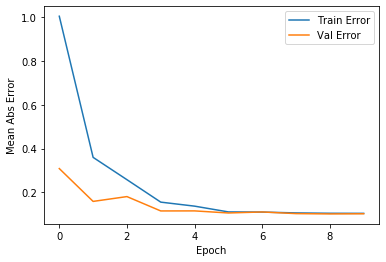

In [19]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error')
    plt.plot(hist['epoch'], hist['mean_absolute_error'],
           label='Train Error')
    plt.plot(hist['epoch'], hist['val_mean_absolute_error'],
           label = 'Val Error')
    #plt.ylim([0,2])
    plt.legend()

plot_history(history)

In [20]:
print_score(model1)

['mae train: ', 0.10297515302275868, 'mae val: ', 0.1025786350565479]


We use Neural Network to build the model with [32,16,8,1] neurons in each layer and got MAE 0.1135 on val set. Each epoch training use 16s. It seems we have to normalize the input to improve the training speed.

# Normalization

In [21]:
from sklearn.preprocessing import RobustScaler

In [22]:
scaler = RobustScaler(quantile_range=(1.0, 99.0))

In [23]:
X_train_norm = scaler.fit_transform(X_train)
X_val_norm = scaler.transform(X_val)

In [24]:
def build_model():

    # instantiate model
    model = Sequential()

    # we can think of this chunk as the input layer
    model.add(Dense(32, input_dim=X_train.shape[1],activation='relu'))
    # we can think of this chunk as the hidden layer    
    
    model.add(Dense(16,activation='relu'))
    
    model.add(Dense(8,activation='relu'))


    # we can think of this chunk as the output layer
    model.add(Dense(1))


    # setting up the optimization of our weights 
    model.compile(loss='mean_squared_error', optimizer='adam',metrics=['mae'])
    return model
model_norm = build_model()

In [25]:
#introduce early stop conditons
from tensorflow import keras
# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

In [26]:
history2 = model_norm.fit(X_train_norm, y_train, epochs=50,batch_size=64, 
                  validation_data= (X_val_norm,y_val), verbose = 1,callbacks=[early_stop])

Train on 474982 samples, validate on 52444 samples
Epoch 1/50
474982/474982 [==============================] - 11s 23us/step - loss: 0.0199 - mean_absolute_error: 0.1044 - val_loss: 0.0184 - val_mean_absolute_error: 0.1007
Epoch 2/50
474982/474982 [==============================] - 15s 32us/step - loss: 0.0183 - mean_absolute_error: 0.1000 - val_loss: 0.0182 - val_mean_absolute_error: 0.1007
Epoch 3/50
474982/474982 [==============================] - 15s 32us/step - loss: 0.0182 - mean_absolute_error: 0.0996 - val_loss: 0.0182 - val_mean_absolute_error: 0.0995
Epoch 4/50
474982/474982 [==============================] - 15s 32us/step - loss: 0.0182 - mean_absolute_error: 0.0994 - val_loss: 0.0180 - val_mean_absolute_error: 0.0987
Epoch 5/50
474982/474982 [==============================] - 15s 32us/step - loss: 0.0181 - mean_absolute_error: 0.0992 - val_loss: 0.0180 - val_mean_absolute_error: 0.0991
Epoch 6/50
474982/474982 [==============================] - 16s 33us/step - loss: 0.0181 

In [ ]:
plot_history(history2)

In [27]:
def print_score2(model):
    res = ['mae train: ', mean_absolute_error(model.predict(X_train_norm), y_train), 
           'mae val: ', mean_absolute_error(model.predict(X_val_norm), y_val)]
    if hasattr(model, 'oob_score_'): res.append(model.oob_score_)
    print(res)
print_score2(model_norm)

['mae train: ', 0.098001286653178, 'mae val: ', 0.09788353783080757]


As we can see, only one epoch converge the loss with 0.100 MAE on val set. 

# Bucketized model

In this section, we will build some models instead treating all of the columns as numerical column, we could bucketize some colunm and see if we can improve the model further. Refer to [tenserfow documents](https://www.tensorflow.org/beta/tutorials/keras/feature_columns).

In [28]:
data_stats= data_sample.describe()

In [29]:
data_stats.T

,count,mean,std,min,25%,50%,75%,max
assists,527426.0,0.255661,0.605957,0.00,0.000000,0.0000,0.0000,10.00
boosts,527426.0,1.299947,1.827454,0.00,0.000000,0.0000,2.0000,18.00
damageDealt,527426.0,143.181881,175.418323,0.00,6.367750,98.0000,200.0000,3240.00
DBNOs,527426.0,0.697626,1.179051,0.00,0.000000,0.0000,1.0000,25.00
headshotKills,527426.0,0.253110,0.625276,0.00,0.000000,0.0000,0.0000,16.00
heals,527426.0,1.573002,2.849647,0.00,0.000000,0.0000,2.0000,49.00
killPlace,527426.0,43.812171,26.348545,1.00,21.000000,43.0000,65.0000,100.00
killPoints,527426.0,504.466949,627.989651,0.00,0.000000,0.0000,1172.0000,2126.00
kills,527426.0,1.030905,1.599639,0.00,0.000000,0.0000,2.0000,23.00
killStreaks,527426.0,0.593748,0.724696,0.00,0.000000,0.0000,1.0000,13.00


As we can see in 25, 50, and 75 percentile columns in DBNOs,assists, etc., the data is extremely skewed, many of them can not use a norm standardization. If we bucketize those columns we hopefully get a better model.

In [30]:
data_sample.columns

Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints', 'winPlacePerc', 'playersJoined',
       'killsNorm', 'damageDealtNorm', 'maxPlaceNorm', 'matchDurationNorm',
       'totalDistance', 'killsWithoutMoving', 'headshot_rate', 'matchType_duo',
       'matchType_duo-fpp', 'matchType_solo', 'matchType_solo-fpp',
       'matchType_squad', 'matchType_squad-fpp'],
      dtype='object')

In [31]:
bucket_columns= ['DBNOs', 'assists','headshotKills',
 'killStreaks','roadKills',
 'teamKills', 'revives','boosts',
 'heals','weaponsAcquired',
 'vehicleDestroys']
num_columns= ['matchType_duo',
 'matchType_duo-fpp',
 'matchType_solo',
 'matchType_solo-fpp',
 'matchType_squad',
 'matchType_squad-fpp']
norm_columns= ['damageDealtNorm','killsNorm',
 'longestKill','rideDistance',
 'swimDistance',
 'walkDistance',
 'totalDistance','numGroups']

Let's use `KBinsDiscretizer` in sklearn pacakge to convert numeric collumn to bucketized columns

In [32]:
from sklearn.preprocessing import KBinsDiscretizer,StandardScaler

In [33]:
def feature_trans(train,test):
    # bucket column
    kbin = KBinsDiscretizer(100,encode='onehot-dense')
    bucks = kbin.fit_transform(train[bucket_columns]) 
    bucks_test = kbin.transform(test[bucket_columns])
    # numerical column
    num = train[num_columns]
    num_test = test[num_columns]
    
    
    # normalized column
    scaler = StandardScaler()
    norm = scaler.fit_transform(train[norm_columns])
    norm_test = scaler.transform(test[norm_columns])
    #
    train_trans = np.concatenate((bucks,num,norm),axis=1)
    test_trans = np.concatenate((bucks_test,num_test,norm_test),axis=1)
    return train_trans,test_trans
    
    

In [34]:
X_train_trans,X_val_trans = feature_trans(X_train,X_val)

In [37]:
from keras.layers.normalization import BatchNormalization
from keras.models import Sequential
from keras.layers import Dense
from keras import metrics

def build_model():
    # instantiate model
    model = Sequential()

    # we can think of this chunk as the input layer
    model.add(Dense(32, input_dim=X_train_trans.shape[1],activation='relu'))
    # we can think of this chunk as the hidden layer    
    
    model.add(Dense(16,activation='relu'))
    
    model.add(Dense(8,activation='relu'))


    # we can think of this chunk as the output layer
    model.add(Dense(1))


    # setting up the optimization of our weights 
    #sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
    model.compile(loss='mean_squared_error', optimizer='adam',metrics=['mae'])
    return model
model_trans = build_model()

In [38]:
#introduce early stop conditons
from tensorflow import keras
# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
history3=model_trans.fit(X_train_trans, y_train, epochs=50,batch_size=64, 
                  validation_data= (X_val_trans,y_val), verbose = 1,callbacks=[early_stop])

Train on 474982 samples, validate on 52444 samples
Epoch 1/50
474982/474982 [==============================] - 22s 46us/step - loss: 0.0197 - mean_absolute_error: 0.1039 - val_loss: 0.0182 - val_mean_absolute_error: 0.0991
Epoch 2/50
474982/474982 [==============================] - 25s 53us/step - loss: 0.0183 - mean_absolute_error: 0.1000 - val_loss: 0.0183 - val_mean_absolute_error: 0.1005
Epoch 3/50
474982/474982 [==============================] - 25s 53us/step - loss: 0.0182 - mean_absolute_error: 0.0996 - val_loss: 0.0180 - val_mean_absolute_error: 0.0991
Epoch 4/50
474982/474982 [==============================] - 25s 54us/step - loss: 0.0182 - mean_absolute_error: 0.0994 - val_loss: 0.0181 - val_mean_absolute_error: 0.0988
Epoch 5/50
474982/474982 [==============================] - 26s 54us/step - loss: 0.0182 - mean_absolute_error: 0.0993 - val_loss: 0.0182 - val_mean_absolute_error: 0.1014
Epoch 6/50
474982/474982 [==============================] - 26s 54us/step - loss: 0.0181 

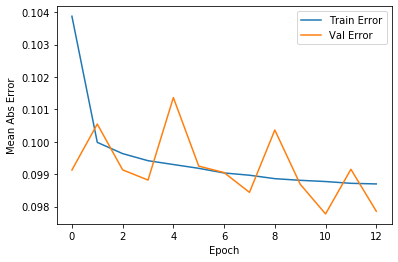

In [40]:
plot_history(history3)

In [41]:
def print_score3(model):
    res = ['mae train: ', mean_absolute_error(model.predict(X_train_trans), y_train), 
           'mae val: ', mean_absolute_error(model.predict(X_val_trans), y_val)]
    if hasattr(model, 'oob_score_'): res.append(model.oob_score_)
    print(res)
print_score3(model_trans)

['mae train: ', 0.09797943230830218, 'mae val: ', 0.09785820703445845]


In [42]:
pred = model_trans.predict(X_val_trans)[:,0]
true = y_val

In [43]:
import seaborn as sns

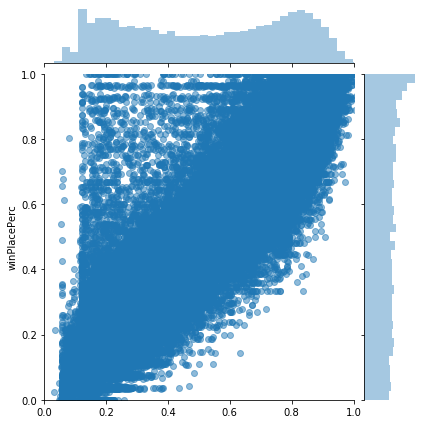

In [44]:
def plot_result(pred,true):
    sns.jointplot(x=pred,y=true,xlim=(0,1),ylim=(0,1),alpha=0.5)
    #plt.plot([[0,0],[1,1]],'-',color='r')
plot_result(pred,true)

There are some errors on upper left conner , let's see what they are.

In [45]:
idx=np.argwhere(true-pred>=0.5)[:,0]

C:\Users\yuyon\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:56: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return getattr(obj, method)(*args, **kwds)


In [46]:
error_stats = X_val.iloc[idx].describe()

In [47]:
error_plot= error_stats.loc[['mean'],['matchType_duo','matchType_duo-fpp' ,'matchType_solo',
'matchType_solo-fpp','matchType_squad','matchType_squad-fpp']]
error_plot

,matchType_duo,matchType_duo-fpp,matchType_solo,matchType_solo-fpp,matchType_squad,matchType_squad-fpp
mean,0.057339,0.149083,0.002294,0.011468,0.240826,0.538991


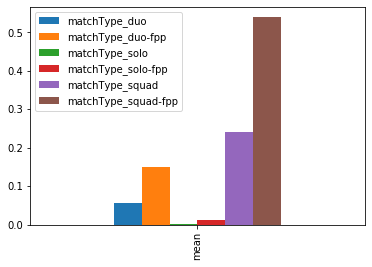

In [48]:
error_plot.plot(kind='bar')
plt.show()

As we can see ` matchType_squad-fpp `has huge errors 

### Try fit only 'squad-fpp' data

In [49]:
X_train_squad_fpp = X_train_trans[X_train['matchType_squad-fpp'] == 1]
y_train_squad_fpp = y_train[X_train['matchType_squad-fpp'] == 1]
X_val_squad_fpp = X_val_trans[X_val['matchType_squad-fpp'] == 1]
y_val_squad_fpp = y_val[X_val['matchType_squad-fpp'] == 1]

In [50]:
X_train_squad_fpp.shape

(171990, 70)

In [51]:
model_squad_fpp = build_model()

In [52]:
history_squad_fpp = model_squad_fpp.fit(X_train_squad_fpp, y_train_squad_fpp, epochs=10,batch_size=64, 
                  validation_data= (X_val_squad_fpp,y_val_squad_fpp), verbose = 1,callbacks=[early_stop])

Train on 171990 samples, validate on 18835 samples
Epoch 1/10
171990/171990 [==============================] - 7s 38us/step - loss: 0.0264 - mean_absolute_error: 0.1202 - val_loss: 0.0237 - val_mean_absolute_error: 0.1161
Epoch 2/10
171990/171990 [==============================] - 9s 53us/step - loss: 0.0233 - mean_absolute_error: 0.1137 - val_loss: 0.0229 - val_mean_absolute_error: 0.1116
Epoch 3/10
171990/171990 [==============================] - 9s 53us/step - loss: 0.0231 - mean_absolute_error: 0.1129 - val_loss: 0.0227 - val_mean_absolute_error: 0.1112
Epoch 4/10
171990/171990 [==============================] - 9s 53us/step - loss: 0.0231 - mean_absolute_error: 0.1128 - val_loss: 0.0228 - val_mean_absolute_error: 0.1105
Epoch 5/10
171990/171990 [==============================] - 9s 53us/step - loss: 0.0230 - mean_absolute_error: 0.1125 - val_loss: 0.0230 - val_mean_absolute_error: 0.1123
Epoch 6/10
171990/171990 [==============================] - 9s 54us/step - loss: 0.0230 - mean

Let's evaluate only 'squad_fpp' data,using original model

In [53]:
def print_score3(model):
    res = ['mae train: ', mean_absolute_error(model.predict(X_train_squad_fpp), y_train_squad_fpp), 
           'mae val: ', mean_absolute_error(model.predict(X_val_squad_fpp), y_val_squad_fpp)]
    if hasattr(model, 'oob_score_'): res.append(model.oob_score_)
    print(res)
print_score3(model_trans)

['mae train: ', 0.11095017603490966, 'mae val: ', 0.11053669322382084]


Use new model

In [54]:
print_score3(model_squad_fpp)

['mae train: ', 0.11213999750067422, 'mae val: ', 0.11182487258049231]


There is no obvious difference between two models, therefore, some the **intrinsic** problems in the model. 

### View prediction for different match type

In [55]:
def predict_matchType(feature):
    X_train_squad_fpp = X_train_trans[X_train[feature] == 1]
    y_train_squad_fpp = y_train[X_train[feature] == 1]
    X_val_squad_fpp = X_val_trans[X_val[feature] == 1]
    y_val_squad_fpp = y_val[X_val[feature] == 1]
    
    def print_score3(model):
        res = ['mae train: ', mean_absolute_error(model.predict(X_train_squad_fpp), y_train_squad_fpp), 
               'mae val: ', mean_absolute_error(model.predict(X_val_squad_fpp), y_val_squad_fpp)]
        if hasattr(model, 'oob_score_'): res.append(model.oob_score_)
        print(res)
    print_score3(model_trans)
    
    pred = model_trans.predict(X_val_squad_fpp)[:,0]
    true = y_val_squad_fpp
    sns.jointplot(x=pred,y=true,xlim=(0,1),ylim=(0,1),alpha=0.5)
    

['mae train: ', 0.0821015919757699, 'mae val: ', 0.08229529884695533]


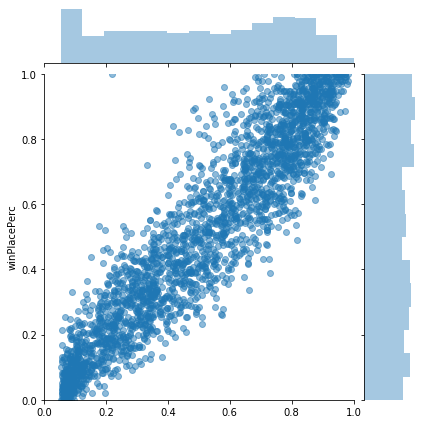

In [56]:
predict_matchType('matchType_solo')

['mae train: ', 0.07301427479510962, 'mae val: ', 0.07282475100456089]


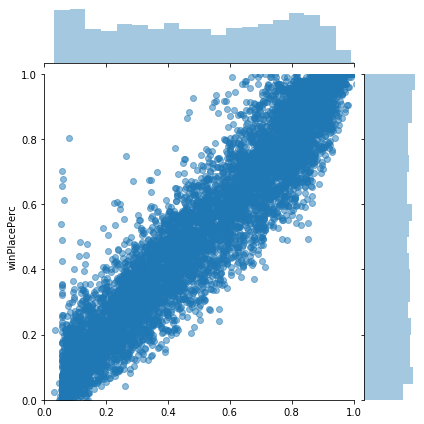

In [57]:
predict_matchType('matchType_solo-fpp')

['mae train: ', 0.094329908840715, 'mae val: ', 0.0924993457878662]


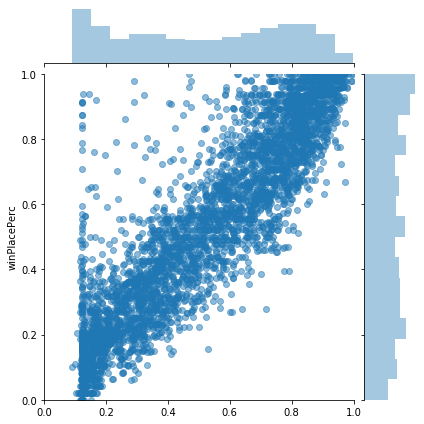

In [58]:
predict_matchType('matchType_duo')

['mae train: ', 0.08625392559622393, 'mae val: ', 0.08586158874110436]


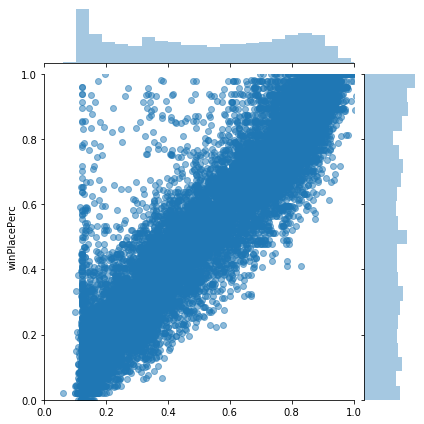

In [59]:
predict_matchType('matchType_duo-fpp')

['mae train: ', 0.12163296439333364, 'mae val: ', 0.12541029354785044]


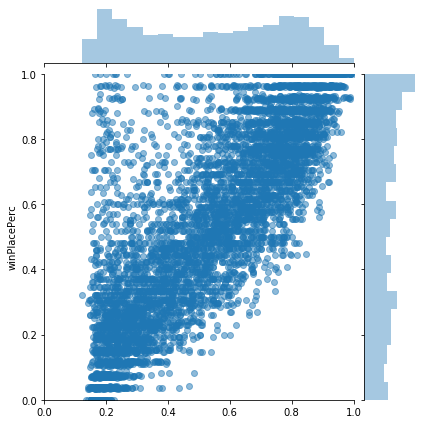

In [60]:
predict_matchType('matchType_squad')

['mae train: ', 0.11095017603490966, 'mae val: ', 0.11053669322382084]


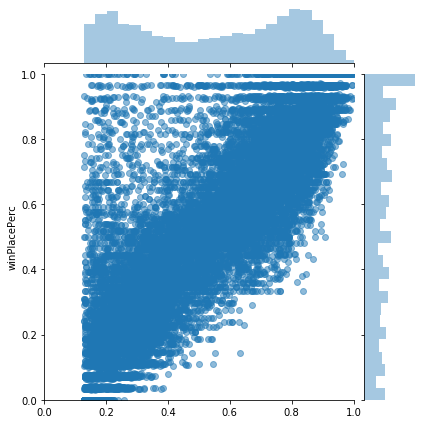

In [61]:
predict_matchType('matchType_squad-fpp')

As we can observe, the model performs better on 'solo' games than 'duo' and 'squad' games. This is because the winPlace will be same for all members in the team. Even if all other members have been knocked in the early game, as long as one member win the game, all other member will get the 1st place.

We will build a pipe to preprocessing data and combine the keras model in the model.

- First, bucketized some columns
- Second, standarize some columns
- Third, ...

# demo

In [66]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import FeatureUnion, Pipeline 

#Custom Transformer that extracts columns passed as argument to its constructor 
class FeatureSelector( BaseEstimator, TransformerMixin ):
    #Class Constructor 
    def __init__( self, feature_names ):
        # in case only one feature passed
        if isinstance(feature_names,list):
            self._feature_names = feature_names
        else:
            self._feature_names = [feature_names]
    
    #Return self nothing else to do here    
    def fit( self, X, y = None ):
        return self 
    
    #Method that describes what we need this transformer to do
    def transform( self, X, y = None ):
        return X[ self._feature_names ] 

class FeatureTransformer(BaseEstimator, TransformerMixin):
    """
    """
    #Class Constructor
    def __init__( self ):
        pass
        
    #Return self, nothing else to do here
    def fit( self, X, y = None ):
        return self 
    
    #Custom transform method we wrote that creates aformentioned features and drops redundant ones 
    def transform(self, X, y = None):
        X =  X.copy() 
        
        # Create feature playersJoined
        X['playersJoined'] = X.groupby('matchId')['matchId'].transform('count')
        # Create feature totalDistance
        X['totalDistance'] = X['rideDistance'] + X['walkDistance'] + X['swimDistance']
        # Create feature killsWithoutMoving
        X['killsWithoutMoving'] = ((X['kills'] > 0) & (X['totalDistance'] == 0))
        # Remove outliers
        X.drop(X[X['killsWithoutMoving'] == True].index, inplace=True)
        

        return X

In [199]:
bucket_columns= ['DBNOs', 'assists','headshotKills',
 'killStreaks','roadKills',
 'teamKills', 'revives','boosts',
 'heals','weaponsAcquired',
 'vehicleDestroys']
num_columns= ['matchType_duo',
 'matchType_duo-fpp',
 'matchType_solo',
 'matchType_solo-fpp',
 'matchType_squad',
 'matchType_squad-fpp']
numerical_columns= ['damageDealt','killsNorm',
 'longestKill','rideDistance',
 'swimDistance',
 'walkDistance',
 'totalDistance','numGroups','headshot_rate']

In [200]:
val.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,matchDurationNorm,totalDistance,killsWithoutMoving,headshot_rate,matchType_duo,matchType_duo-fpp,matchType_solo,matchType_solo-fpp,matchType_squad,matchType_squad-fpp
14,95aaab951e3eec,84c97cfeefc4f5,a1729dc8da7e7a,0,4,283.10,0,1,14,27,...,2114.63,3683.00,False,1.000000,0,1,0,0,0,0
28,639c7572ee615f,972c413bb48b2a,b7946a98c0db1c,0,0,22.44,0,0,0,83,...,2328.45,260.90,False,0.000000,0,0,0,0,0,1
29,b61be579852d1d,eb55f010bf9d73,680ff0e7852bf8,1,3,569.20,5,2,8,7,...,2407.68,7881.97,False,0.666667,0,0,0,0,0,1
36,7ffb5692c068d4,9423e5e04ec304,0ea0bea88eda80,0,1,60.84,0,0,6,36,...,2602.86,6402.00,False,0.000000,0,0,0,0,1,0
44,7a4ef62ff89e43,854c1f7676828b,fdaca553cc2343,0,0,0.00,0,0,0,99,...,1968.69,13.20,False,0.000000,0,0,0,0,0,1


In [201]:
from sklearn.preprocessing import KBinsDiscretizer,StandardScaler
#Defining the steps in the categorical pipeline 
bucket_pipeline = Pipeline(steps = [('bucket_selector', FeatureSelector(bucket_columns)),
                                ('bucket_encoder', KBinsDiscretizer(100,encode='onehot-dense'))])
numerical_pipeline = Pipeline(steps = [('num_selector', FeatureSelector(numerical_columns) ),
                                  ('std_scaler', StandardScaler())])
num_pipeline = Pipeline(steps = [('num_selector', FeatureSelector(numerical_columns) )
                                  ])

#Combining numerical and categorical piepline into one full big pipeline horizontally 
#using FeatureUnion
full_pipeline = FeatureUnion( transformer_list = [('bucket_pipeline', bucket_pipeline), 
                                                  ('numerical_pipeline', numerical_pipeline)])

In [202]:
def feature_transformer(train,test):
    encode_train = full_pipeline.fit_transform(train)
    encode_train = pd.concat((train[['groupId','winPlacePerc']],
                               pd.DataFrame(encode_train,index=train.index)),axis=1)
    encode_test = full_pipeline.transform(test)
    encode_test = pd.concat((test[['groupId','winPlacePerc']],
                               pd.DataFrame(encode_test,index=test.index)),axis=1)
    return encode_train,encode_test

In [203]:
squad_train = train[train['matchType'].isin(['squad','squad-fpp'])]
squad_val = val[val['matchType'].isin(['squad','squad-fpp'])]

In [204]:
encode_train,encode_test = feature_transformer(squad_train,squad_val)

In [78]:
def group_transformer(data,members=2):
    data_copy = data.copy().drop(['groupId','winPlacePerc'],axis=1)
    data_group = data.groupby('groupId')
    data_np = []
    label = []
    count = 0
    for key,items in data_group.indices.items():
        if count%10000==0:
            print(count,key)
        count +=1
        
        # there are some exceptions; get rid of those.
        if members-items.shape[0] < 0:
            continue
            
        #get columns
        label.append(data.iloc[items]['winPlacePerc'].values[0])
        
        # padding zeros if only one member in the group
        sub_group = data_copy.iloc[items]
        data_pad = np.pad(sub_group, ((0,members-sub_group.shape[0]),(0,0)), 'constant')
        data_np.append(data_pad)
        
    data_np = np.array(data_np)
    label = np.array(label).reshape(-1,1)
    return data_np,label

In [106]:
def group_transformer2(data,members=2):
    data_copy = data.copy().drop(['groupId','winPlacePerc'],axis=1)
    data_group = data.groupby('groupId')
    data_np = []
    label = []
    def func(x,members):
        label.append(x['winPlacePerc'].values[0])
        values = x.iloc[:,2:].values
        data_np.append(np.pad(values, ((0,members-values.shape[0]),(0,0)), 'constant'))
    # use lambda function
    data_group.apply(lambda x:func(x,members))
    data_np = np.array(data_np)
    label = np.array(label).reshape(-1,1)
    return data_np,label

In [185]:
def group_transformer3(data,members=2):
    data_copy = data.copy().drop(['groupId','winPlacePerc'],axis=1)
    data_group = data.groupby('groupId')
    data_np = []
    label = []
    def func(x,members):
        label.append(x['winPlacePerc'].values[0])
        values = x.values[:,2:]
        data_np.append(np.pad(values, ((0,members-values.shape[0]),(0,0)), 'constant'))
    # use lambda function
    data_group.apply(lambda x:func(x,members))
    data_np = np.array(data_np)
    label = np.array(label).reshape(-1,1)
    return data_np,label

In [205]:
X_train,y_train = group_transformer3(encode_train,members=4)

In [206]:
X_val,y_val = group_transformer3(encode_test,members=4)

### About running time for transformation

In [113]:
import time
start = time.time()
#"the code you want to test stays here"
group_transformer(encode_train,members=4)
end = time.time()
print('method 1:')
print(end - start)

start = time.time()
#"the code you want to test stays here"
group_transformer2(encode_train,members=4)
end = time.time()
print('method 2:')
print(end - start)

start = time.time()
#"the code you want to test stays here"
group_transformer3(encode_train,members=4)
end = time.time()
print('method 3:')
print(end - start)


0 00035baf709ea9
10000 20dd153cd0c771
20000 41e66f308132ab
30000 62c180c51c8675
40000 83cfbc5b319ce9
50000 a45b5470906b6b
60000 c5391cdbc3be85
70000 e61061ae4be2fa
method 1:
105.8479151725769
method 2:
48.25109910964966


### Build model

In [207]:
from keras.layers import TimeDistributed,Flatten,MaxPooling1D,Input,Reshape
from keras import Model
# Input tensor for sequences of 20 timesteps,
# each containing a 784-dimensional vector
def build_model(member=4,input_shape=(4,60)):
    """if duo game member = 2
    if squadgame member =4
    """
    input_sequences = Input(shape=input_shape)
    model = Sequential()
    model.add(Dense(32))
    model.add(Dense(16))
    model.add(Dense(8))
    model.add(Dense(1))
    # This applies our previous model to every timestep in the input sequences.
    # the output of the previous model was a 10-way softmax,
    # so the output of the layer below will be a sequence of 20 vectors of size 10.
    processed_sequences = TimeDistributed(model)(input_sequences)
    #x= Flatten()(processed_sequences)
    maxpool = MaxPooling1D(pool_size= member )(processed_sequences)

    outputs = Flatten()(maxpool)

    model_f = Model(inputs=input_sequences,outputs=outputs)

    model_f.compile(loss='mean_squared_error', optimizer='adam',metrics=['mae'])

    return model_f
model_f = build_model(member=4,input_shape=X_train.shape[1:3])
model_f.summary()
    

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 4, 69)             0         
_________________________________________________________________
time_distributed_7 (TimeDist (None, 4, 1)              2913      
_________________________________________________________________
max_pooling1d_7 (MaxPooling1 (None, 1, 1)              0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 1)                 0         
Total params: 2,913
Trainable params: 2,913
Non-trainable params: 0
_________________________________________________________________


In [208]:
#introduce early stop conditons
from tensorflow import keras
# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
history_duo = model_f.fit(X_train, y_train, epochs=50,batch_size=64, 
                  validation_data= (X_val,y_val), verbose = 1,callbacks=[early_stop])

Train on 77895 samples, validate on 8556 samples
Epoch 1/50
77895/77895 [==============================] - 7s 86us/step - loss: 0.0214 - mean_absolute_error: 0.1113 - val_loss: 0.0183 - val_mean_absolute_error: 0.1055
Epoch 2/50
77895/77895 [==============================] - 10s 127us/step - loss: 0.0177 - mean_absolute_error: 0.1050 - val_loss: 0.0180 - val_mean_absolute_error: 0.1076
Epoch 3/50
77895/77895 [==============================] - 9s 120us/step - loss: 0.0174 - mean_absolute_error: 0.1042 - val_loss: 0.0176 - val_mean_absolute_error: 0.1037
Epoch 4/50
77895/77895 [==============================] - 9s 121us/step - loss: 0.0173 - mean_absolute_error: 0.1040 - val_loss: 0.0178 - val_mean_absolute_error: 0.1048
Epoch 5/50
77895/77895 [==============================] - 9s 119us/step - loss: 0.0172 - mean_absolute_error: 0.1037 - val_loss: 0.0176 - val_mean_absolute_error: 0.1047
Epoch 6/50
77895/77895 [==============================] - 10s 123us/step - loss: 0.0172 - mean_absolu

In [209]:
def print_score4(model):
    res = ['mae train: ', mean_absolute_error(model.predict(X_train), y_train), 
           'mae val: ', mean_absolute_error(model.predict(X_val), y_val)]
    if hasattr(model, 'oob_score_'): res.append(model.oob_score_)
    print(res)
print_score4(model_f)

['mae train: ', 0.10228592620195867, 'mae val: ', 0.10276328007285007]


In [210]:
pred = model_f.predict(X_val)[:,0]
true = y_val[:,0]

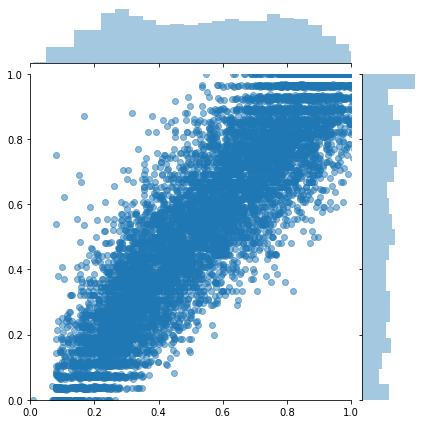

In [211]:
sns.jointplot(x=pred,y=true,xlim=(0,1),ylim=(0,1),alpha=0.5)

# ALL data

In [121]:
encode_train,encode_test = feature_transformer(train,val)

In [190]:
X_train,y_train = group_transformer3(encode_train,members=4)
X_val,y_val = group_transformer3(encode_test,members=4)

In [191]:
def build_model(member=4,input_shape=(4,60)):
    """if duo game member = 2
    if squadgame member =4
    """
    input_sequences = Input(shape=input_shape)
    model = Sequential()
    model.add(Dense(32))
    model.add(Dense(16))
    model.add(Dense(8))
    model.add(Dense(1))
    # This applies our previous model to every timestep in the input sequences.
    # the output of the previous model was a 10-way softmax,
    # so the output of the layer below will be a sequence of 20 vectors of size 10.
    processed_sequences = TimeDistributed(model)(input_sequences)
    #x= Flatten()(processed_sequences)
    maxpool = MaxPooling1D(pool_size= member )(processed_sequences)

    outputs = Flatten()(maxpool)

    model_f = Model(inputs=input_sequences,outputs=outputs)

    model_f.compile(loss='mean_squared_error', optimizer='adam',metrics=['mae'])

    return model_f

In [192]:
model_final = build_model (member=4,input_shape=X_train.shape[1:3])
model_final.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 4, 64)             0         
_________________________________________________________________
time_distributed_6 (TimeDist (None, 4, 1)              2753      
_________________________________________________________________
max_pooling1d_6 (MaxPooling1 (None, 1, 1)              0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 1)                 0         
Total params: 2,753
Trainable params: 2,753
Non-trainable params: 0
_________________________________________________________________


In [193]:
#introduce early stop conditons
from tensorflow import keras
# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
history_final = model_final.fit(X_train, y_train, epochs=50,batch_size=64, 
                  validation_data= (X_val,y_val), verbose = 1,callbacks=[early_stop])

Train on 248864 samples, validate on 27653 samples
Epoch 1/50
248864/248864 [==============================] - 27s 108us/step - loss: 0.0201 - mean_absolute_error: 0.1083 - val_loss: 0.0168 - val_mean_absolute_error: 0.1005
Epoch 2/50
248864/248864 [==============================] - 29s 115us/step - loss: 0.0167 - mean_absolute_error: 0.1017 - val_loss: 0.0164 - val_mean_absolute_error: 0.1001
Epoch 3/50
248864/248864 [==============================] - 29s 118us/step - loss: 0.0164 - mean_absolute_error: 0.1010 - val_loss: 0.0174 - val_mean_absolute_error: 0.1035
Epoch 4/50
248864/248864 [==============================] - 29s 117us/step - loss: 0.0163 - mean_absolute_error: 0.1006 - val_loss: 0.0173 - val_mean_absolute_error: 0.1030
Epoch 5/50
248864/248864 [==============================] - 29s 118us/step - loss: 0.0163 - mean_absolute_error: 0.1004 - val_loss: 0.0164 - val_mean_absolute_error: 0.1002
Epoch 6/50
248864/248864 [==============================] - 29s 118us/step - loss: 0

['mae train: ', 0.10093639462161413, 'mae val: ', 0.10073407555988408]


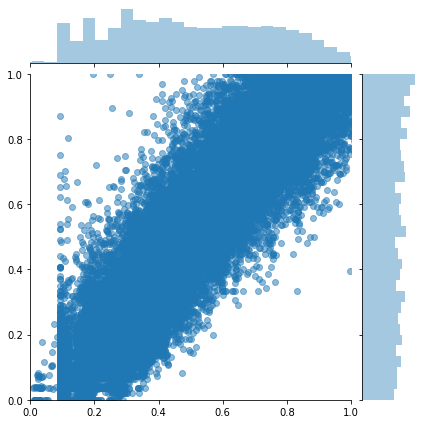

In [195]:
def print_score4(model):
    res = ['mae train: ', mean_absolute_error(model.predict(X_train), y_train), 
           'mae val: ', mean_absolute_error(model.predict(X_val), y_val)]
    if hasattr(model, 'oob_score_'): res.append(model.oob_score_)
    print(res) 
print_score4(model_final)
#prediction
pred = model_final.predict(X_val)[:,0]
true = y_val[:,0]
#plot
sns.jointplot(x=pred,y=true,xlim=(0,1),ylim=(0,1),alpha=0.5)